In [1]:
# Viz for the correlation matrix used to illustrate the concepts of stereotypy and concordance in the paper.

In [2]:
!date

Tue Feb 15 20:23:16 PST 2022


In [3]:
!pwd

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_notebooks/FigureVariation


In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from pathlib import Path
from skimage import io as skio
import matplotlib.pyplot as plt
from cvapipe_analysis.tools import io, viz, general, controller, shapespace, plotting

# import mouskatools

In [5]:
# Controller form cvapipe_analysis
path_config = Path("/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/")
control = controller.Controller(general.load_config_file(path_config))
print(control.get_staging())

/allen/aics/assay-dev/MicroscopyOtherData/Viana/projects/cvapipe_analysis/local_staging_variance


In [6]:
device = io.LocalStagingIO(control)
df = device.load_step_manifest("loaddata")
print(df.shape)

(215081, 39)


In [7]:
matrix_name = "avg-STR-NdSphere-5"

In [8]:
corr = skio.imread(f"{control.get_staging()}/correlation/values/{matrix_name}.tif")
df_rank = pd.read_csv(f"{control.get_staging()}/correlation/values/{matrix_name}.csv", index_col=0)
print(corr.shape, len(df_rank))

(35636, 35636) 35636


In [9]:
genes = df.loc[df_rank.CellIds, "structure_name"].values
loc = np.argsort([control.get_gene_names().index(g) for g in genes])
corr = corr[loc, :]
corr = corr[:, loc]

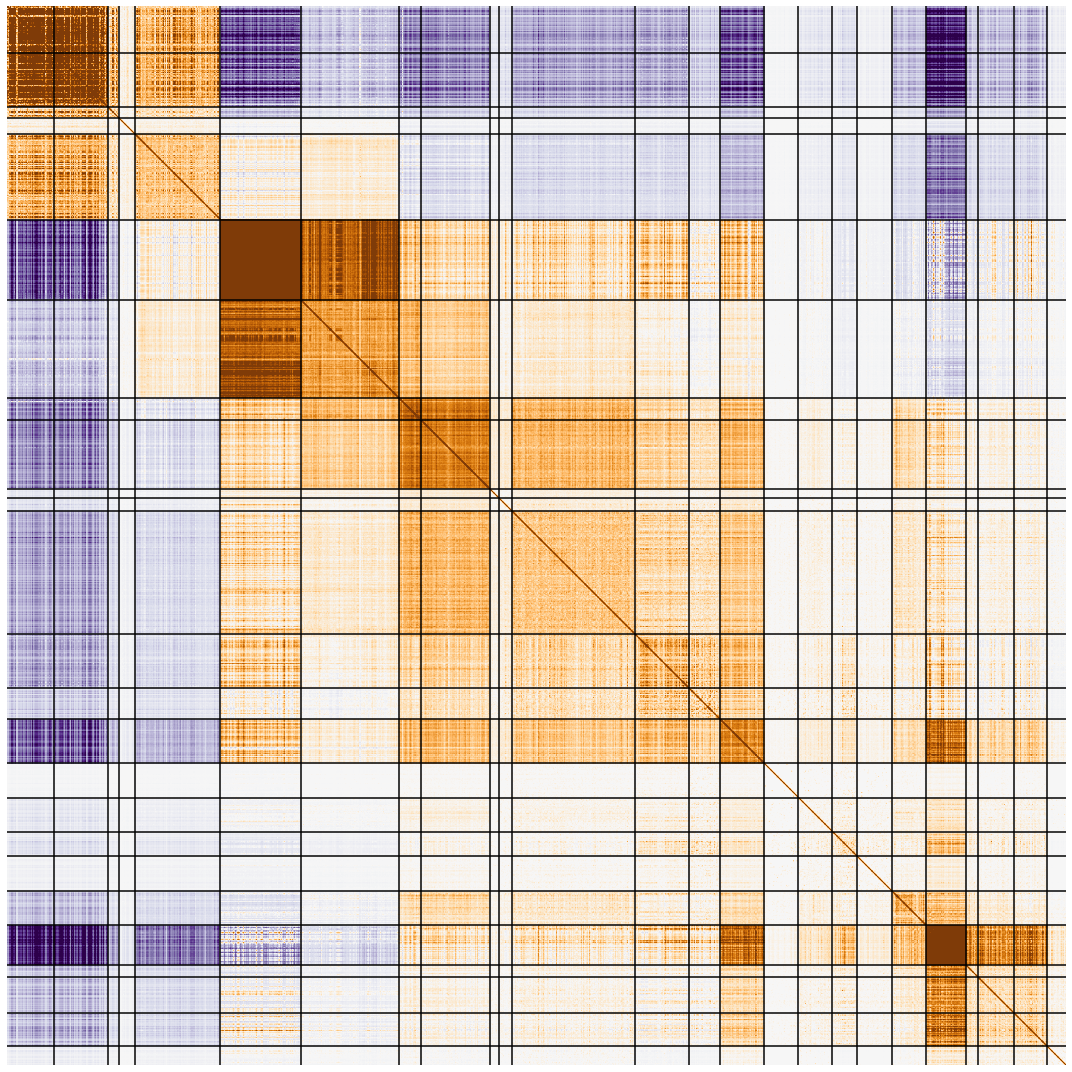

In [19]:
for run, (name, ext, args) in enumerate(zip(["htmp", "show"], ["png", None], [{"dpi": 150}, {}])):
    f = 20
    genes = df.loc[df_rank.loc[loc,"CellIds"]].structure_name
    fig, ax = plt.subplots(1,1, figsize=(15, 15))
    if ext != "pdf":
        ax.imshow(-corr[::f,::f], vmin=-0.2, vmax=0.2, cmap="PuOr")
        for b in np.where(np.diff([control.get_gene_names().index(g) for g in genes]))[0]:
            ax.axvline(x=b/f, color="black")
            ax.axhline(y=b/f, color="black")
    ax.axis("off")
    plt.tight_layout()
    if ext is not None:
        plt.savefig(f"VizCorrelationMatrix_{name}.{ext}", **args)
        plt.close("all")
    else:
        plt.show()

In [20]:
!ls

FigureVariation1.ipynb	VizCorrelationMatrix_htmp.png
